In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

img = cv2.imread('../Inventory.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (144, 32))

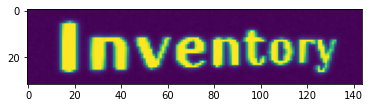

In [11]:
plt.imshow(img)

In [12]:
class Binarizer(nn.Module):
    """See reference: https://zhuanlan.zhihu.com/p/209529856"""
    def __init__(self):
        super().__init__()

    def forward(self, x):
        h, w = x.size(-2), x.size(-1)
        g_list = torch.zeros([255], device=x.device)

        for t in range(0, 255, 2):
            n0 = x[x < t]               # 0 pixels
            n1 = x[x >= t]              # 1 pixels
            w0 = len(n0) / (h * w)      # 0 pixel weight
            w1 = len(n1) / (h * w)      # 1 pixel weight

            u0 = n0.float().mean() if len(n0) > 0 else torch.tensor(0, device=x.device)
            u1 = n1.float().mean() if len(n1) > 0 else torch.tensor(0, device=x.device)

            g_list[t] = w0 * w1 * (u0 - u1) ** 2

        best_t = g_list.argmax(0)

        x[x < best_t] = 0
        x[x >= best_t] = 255
        return x

binarizer = torch.jit.script(Binarizer())

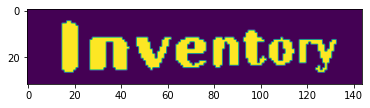

In [13]:
img = model(torch.from_numpy(img)).numpy()
plt.imshow(img)